Example of using the stellar luminosity function

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'starMap_test'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=64, useCache=False)
metric = metrics.StarDensityMetric(metricName='rmag=25')
mafMap = maps.StellarDensityMap()
plotDict = {'colorMin':0.001, 'colorMax':.1, 'logScale':True}
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)

metric = metrics.StarDensityMetric(rmagLimit=27.5,metricName='rmag=28')
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint night < 1095
Found 742544 visits
Running:  ['opsim_rmageq25_night_lt_1095_HEAL', 'opsim_rmageq28_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 1095 sqlconstraint now.
monopole: 0.0131572  dipole: lon: -98.8478, lat: -3.18398, amp: 0.0215576

Optimal bin calculation tried to make 3979 bins, returning 200
Optimal bin calculation tried to make 4403 bins, returning 200



monopole: 0.02672  dipole: lon: -98.1426, lat: -1.33615, amp: 0.0447271
Plotting complete.


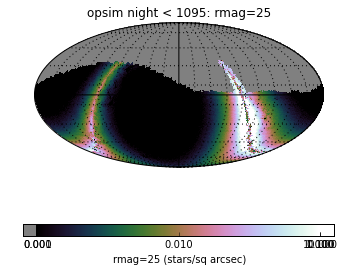

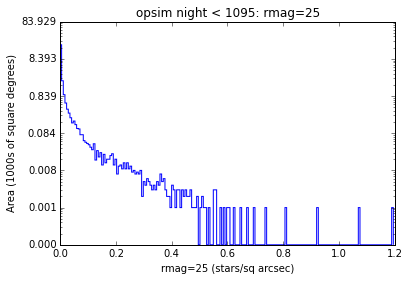

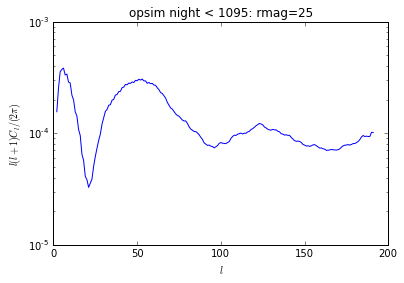

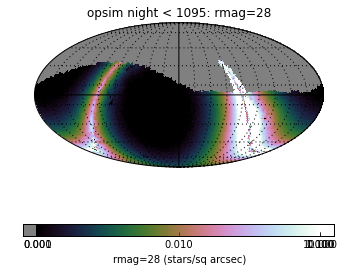

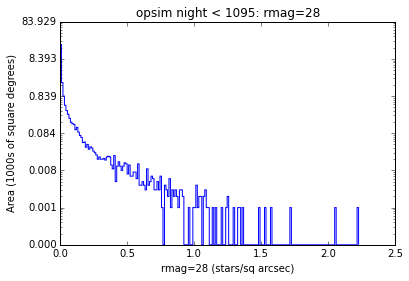

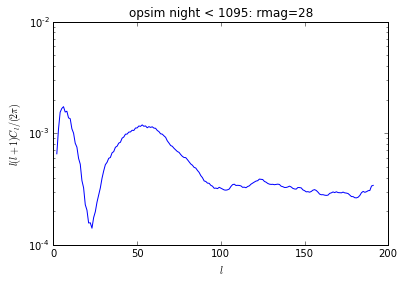

In [4]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)